<a href="https://colab.research.google.com/github/SuhailaAlamn/SuhailaAlmn-github.io/blob/main/Project_Student_Depression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time

In [ ]:
data = pd.read_csv('/content/student_depression_dataset.csv')

# Preview the data
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# View basic information
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
# Example: Fill missing numerical values with the mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Example: Fill missing categorical values with the mode
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


<ipython-input-4-ef207c777018>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# Drop duplicate rows if any
data.drop_duplicates(inplace=True)


In [ ]:
# Convert categorical columns to numeric using label encoding or one-hot encoding
# Label Encoding Example:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
# Use StandardScaler to scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)


In [ ]:
data_scaled.to_csv('/content/student_depression_cleaned.csv', index=False)


In [ ]:
data_scaled.isnull().sum().sum()


np.int64(0)

In [ ]:
data_scaled.dtypes


,0
id,float64
Gender,float64
Age,float64
City,float64
Profession,float64
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [ ]:
data_scaled.shape


(27901, 18)

In [ ]:
data = data.drop(columns=['id'])  # 'id' is not a useful feature


In [ ]:
X = data.drop(columns=['Depression'])  # features
y = data['Depression']                 # target


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the SVM model (you can change kernel to 'linear', 'poly', or 'sigmoid')
svm_model = SVC(kernel='rbf', random_state=42)

# Step 2: Train the model
svm_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8337215552768321

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


SVM Confusion Matrix:
 [[1809  534]
 [ 394 2844]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                          max_iter=300, random_state=42)

# Step 2: Train the model
mlp_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nNeural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Neural Network Accuracy: 0.8263752015767784

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581


Neural Network Confusion Matrix:
 [[1806  537]
 [ 432 2806]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Increase plot size for better visibility
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(model,
          feature_names=X.columns,  # real feature names
          class_names=['No Depression', 'Depression'],  # adjust if you have more classes
          filled=True,
          rounded=True,
          fontsize=10)

# Show the plot
plt.show()


NameError: name 'model' is not defined

<Figure size 2000x1000 with 0 Axes>

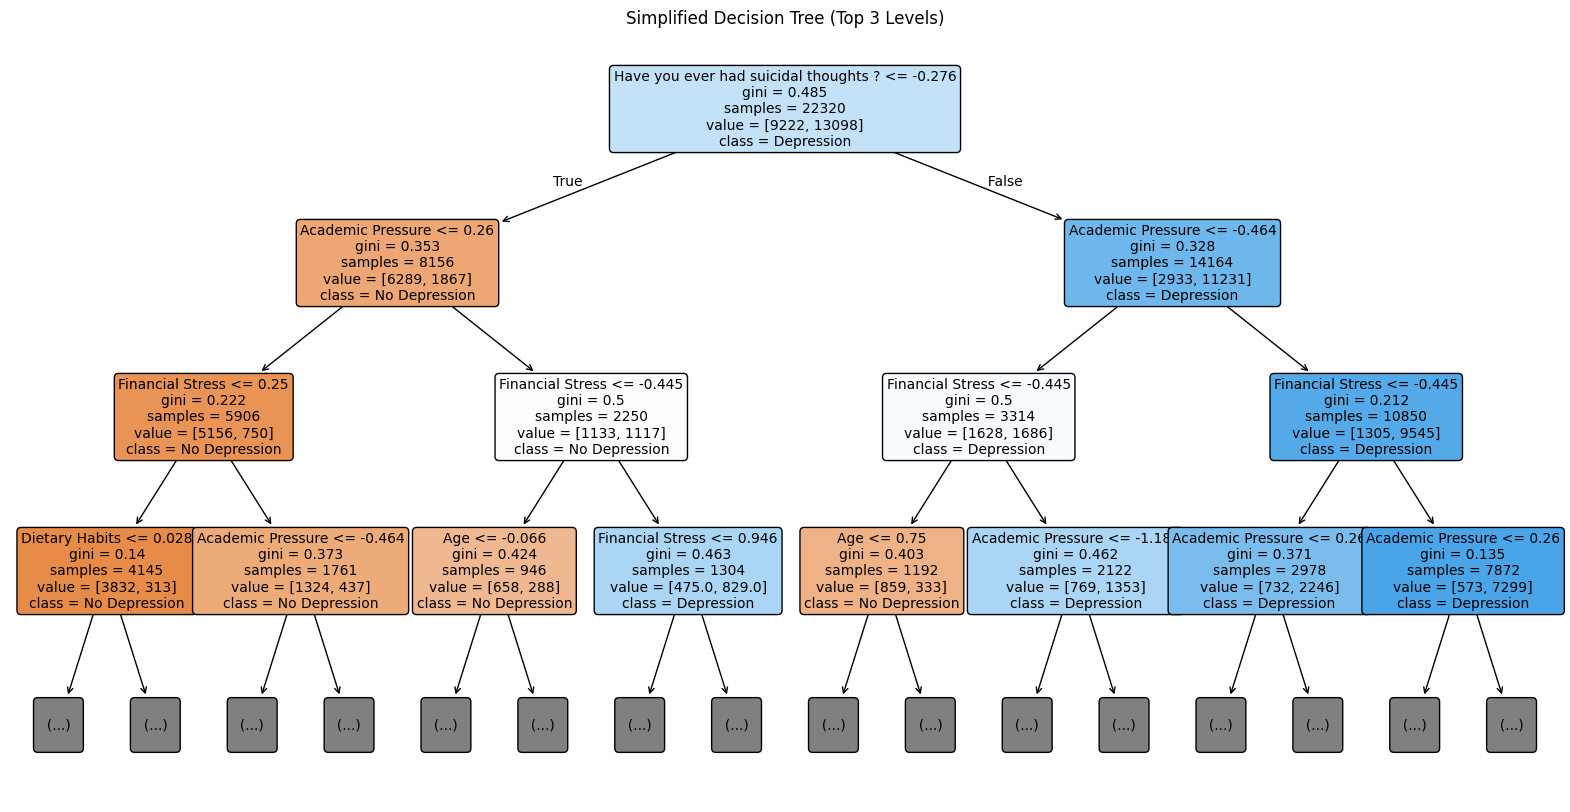

In [ ]:
plt.figure(figsize=(20, 10))

plot_tree(model,
          feature_names=X.columns,
          class_names=['No Depression', 'Depression'],
          filled=True,
          rounded=True,
          max_depth=3,  # Only show top 3 levels
          fontsize=10)

plt.title("Simplified Decision Tree (Top 3 Levels)")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7581078659738398

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      2343
           1       0.80      0.78      0.79      3238

    accuracy                           0.76      5581
   macro avg       0.75      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581


Confusion Matrix:
 [[1711  632]
 [ 718 2520]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create tree with limited depth (e.g., 5)
model_limited = DecisionTreeClassifier(max_depth=5, random_state=42)

# Step 2: Train
model_limited.fit(X_train, y_train)

# Step 3: Predict
y_pred_limited = model_limited.predict(X_test)

# Step 4: Evaluate
print("Accuracy with max_depth=5:", accuracy_score(y_test, y_pred_limited))
print("\nClassification Report:\n", classification_report(y_test, y_pred_limited))


Accuracy with max_depth=5: 0.8138326464791256

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      2343
           1       0.85      0.83      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.82      0.81      0.81      5581



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Apply 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.84214299 0.84695341 0.84247312 0.84444444 0.84623656]
Mean Accuracy: 0.8444501024019667
Standard Deviation: 0.00193335149474407


In [ ]:
from sklearn.neural_network import MLPClassifier

# Basic setup with one hidden layer of 100 neurons
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          random_state=42)


In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two layers
                          activation='tanh',             # Try 'tanh' instead of 'relu'
                          solver='adam',
                          max_iter=1000,
                          early_stopping=True,           # Stop if no improvement
                          random_state=42)


In [ ]:
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [ ]:
MLPClassifier(
    activation='tanh',            # Better for small/medium range data
    early_stopping=True,          # Stops training if validation score stops improving
    hidden_layer_sizes=(128, 64), # Two hidden layers with 128 and 64 neurons
    max_iter=1000,                # Trains up to 1000 iterations (epochs)
    random_state=42               # Ensures consistent results every time
)


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the improved model
mlp_model = MLPClassifier(
    activation='tanh',
    early_stopping=True,
    hidden_layer_sizes=(128, 64),
    max_iter=1000,
    random_state=42
)

# Step 2: Train
mlp_model.fit(X_train, y_train)

# Step 3: Predict
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate
print("Improved Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Improved Neural Network Accuracy: 0.8387385773158932

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2343
           1       0.86      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
 [[1874  469]
 [ 431 2807]]


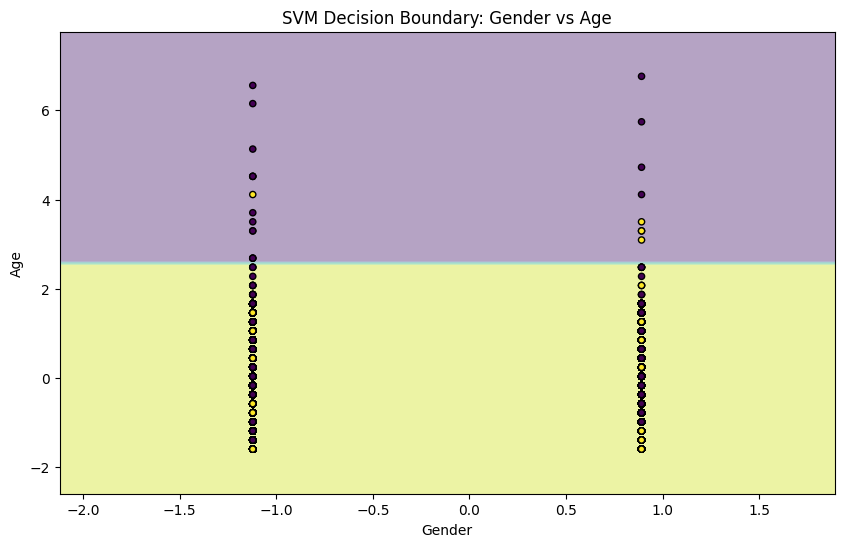

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Select 2 features for visualization (adjust these to real column names)
feature1 = X.columns[0]
feature2 = X.columns[1]

X_2d = X[[feature1, feature2]]
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# Train SVM with 2 features
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_2d_scaled, y)

# Plotting decision boundary
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, s=20, edgecolor='k')
plt.title(f"SVM Decision Boundary: {feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


In [ ]:
print("Neural Network Layers:")
print("Hidden layer sizes:", mlp_model.hidden_layer_sizes)
print("Number of layers (with input & output):", mlp_model.n_layers_)
print("Number of iterations:", mlp_model.n_iter_)
print("Activation function:", mlp_model.activation)


Neural Network Layers:
Hidden layer sizes: (128, 64)
Number of layers (with input & output): 4
Number of iterations: 26
Activation function: tanh


In [ ]:
# 1. Train your SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 2. Train your Decision Tree (with limited depth)
model_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
model_limited.fit(X_train, y_train)

# 3. Train your initial Neural Network (if you used one)
mlp_model_initial = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model_initial.fit(X_train, y_train)

# 4. Your improved Neural Network (already trained earlier)
# If it's not trained again in this session, re-train it too:
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh',
                          early_stopping=True, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test)
y_pred_tree = model_limited.predict(X_test)
y_pred_mlp_initial = mlp_model_initial.predict(X_test)
y_pred_mlp_improved = mlp_model.predict(X_test)


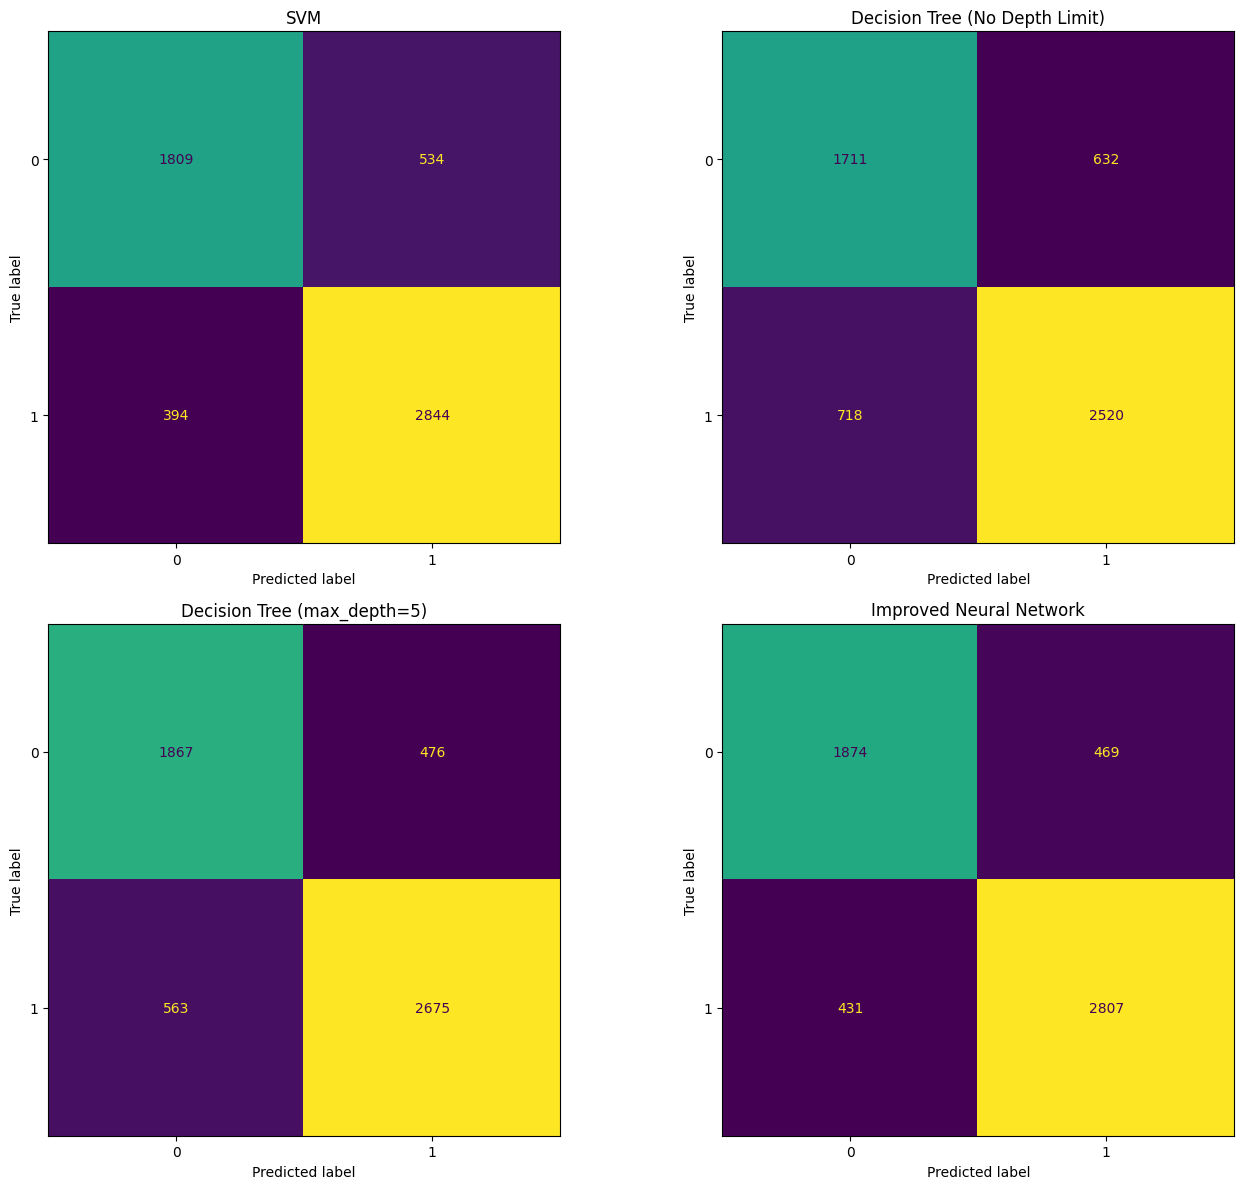

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 2. Train Decision Tree (no depth limit)
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# 3. Train Decision Tree (limited depth = 5)
tree_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_limited.fit(X_train, y_train)

# 4. Train Improved Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh',
                          early_stopping=True, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# 5. Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_tree_full = tree_full.predict(X_test)
y_pred_tree_limited = tree_limited.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test)

# 6. Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title("SVM")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree_full, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title("Decision Tree (No Depth Limit)")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree_limited, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title("Decision Tree (max_depth=5)")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title("Improved Neural Network")

plt.tight_layout()
plt.show()


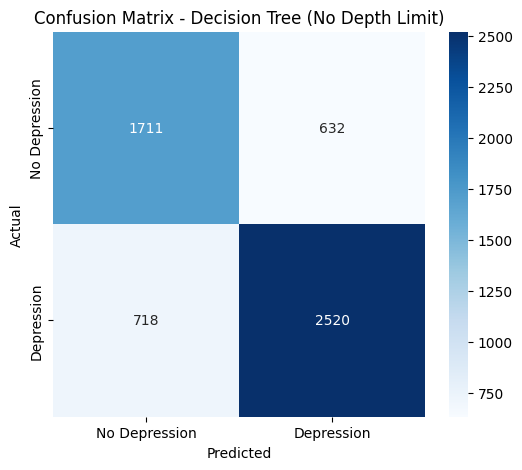

In [ ]:
# Required imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset (replace this with your own CSV if needed)
data = pd.read_csv('/content/student_depression_dataset.csv')

# Preprocessing
data = data.drop(columns=['id'])  # Drop ID column if exists
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree (no depth limit)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (No Depth Limit)')
plt.show()


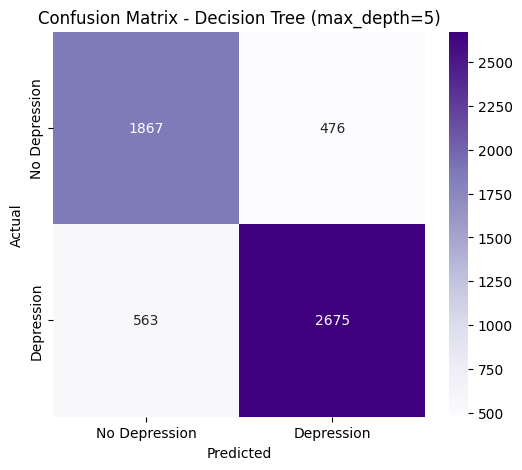

In [ ]:
# Required imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/student_depression_dataset.csv')

# Drop ID column if exists
data = data.drop(columns=['id'])

# Define features and target
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree with max_depth=5
tree_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_limited.fit(X_train, y_train)

# Predict
y_pred_limited = tree_limited.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_limited)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (max_depth=5)')
plt.show()


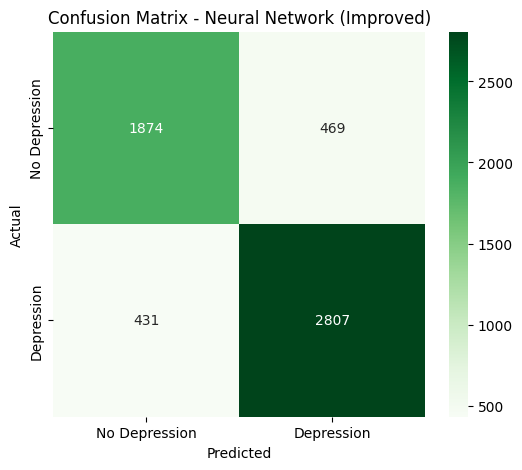

In [ ]:
# Required imports
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/student_depression_dataset.csv')

# Drop ID column if exists
data = data.drop(columns=['id'])

# Define features and target
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train improved Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh',
                          early_stopping=True, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on test data
y_pred_mlp = mlp_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (Improved)')
plt.show()


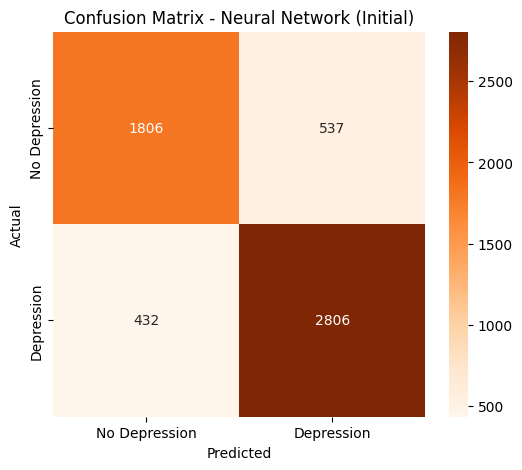

In [ ]:
# Required imports
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/student_depression_dataset.csv')

# Drop ID column if exists
data = data.drop(columns=['id'])

# Define features and target
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 Train initial (basic) neural network
mlp_initial = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_initial.fit(X_train, y_train)

# Predict
y_pred_mlp_initial = mlp_initial.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp_initial)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (Initial)')
plt.show()


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/student_depression_dataset.csv')

# Drop ID column if exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/student_depression_dataset.csv'

In [5]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/student_depression_dataset.csv')  # Adjust path if needed

# Drop ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Depression'])
y = data['Depression']

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Store results
results = []

#  SVM
start = time.time()
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
end = time.time()
y_pred_svm = svm_model.predict(X_test)
results.append({
    'Model': 'SVM',
    'Training Time (s)': round(end - start, 4),
    'Accuracy': round(accuracy_score(y_test, y_pred_svm), 4),
    'F1 Score': round(f1_score(y_test, y_pred_svm), 4)
})

# Decision Tree (Improved - max_depth=5)
start = time.time()
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
end = time.time()
y_pred_tree = tree_model.predict(X_test)
results.append({
    'Model': 'Decision Tree (max_depth=5)',
    'Training Time (s)': round(end - start, 4),
    'Accuracy': round(accuracy_score(y_test, y_pred_tree), 4),
    'F1 Score': round(f1_score(y_test, y_pred_tree), 4)
})

# Neural Network (Improved)
start = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh',
                          early_stopping=True, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
end = time.time()
y_pred_mlp = mlp_model.predict(X_test)
results.append({
    'Model': 'Neural Network (Improved)',
    'Training Time (s)': round(end - start, 4),
    'Accuracy': round(accuracy_score(y_test, y_pred_mlp), 4),
    'F1 Score': round(f1_score(y_test, y_pred_mlp), 4)
})

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\n Training Time, Accuracy & F1 Score for Improved Models:")
print(results_df)



📊 Training Time, Accuracy & F1 Score for Improved Models:
                         Model  Training Time (s)  Accuracy  F1 Score
0                          SVM            22.8418    0.8337    0.8597
1  Decision Tree (max_depth=5)             0.0419    0.8138    0.8374
2    Neural Network (Improved)            15.3437    0.8387    0.8618


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
